## 1. 编写 Tensorflow 线性回归程序    

作业 1 比较简单，于是就在 [TensorFlow Examples Basics](https://github.com/aymericdamien/TensorFlow-Examples/) 的基础上做了改动

### 环境说明：

In [11]:
%load_ext watermark
%watermark -a 'Scott Ming' -v -m -d -p numpy,pandas,matplotlib,tensorflow

Scott Ming 2017-03-25 

CPython 3.5.2
IPython 5.2.2

numpy 1.12.1
pandas 0.19.2
matplotlib 2.0.0
tensorflow 1.0.1

compiler   : GCC 4.9.2
system     : Linux
release    : 3.16.0-4-amd64
machine    : x86_64
processor  : 
CPU cores  : 4
interpreter: 64bit


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

### 1.1 定义数据

In [3]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1]).reshape((17, 1))
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3]).reshape((17, 1))
n_samples = train_X.shape[0]

### 1.2 定义神经网络结果和前向传播的输出结果

In [4]:
# tf Graph Input
X = tf.placeholder(tf.float32, shape=(None, 1), name="x-input")
Y = tf.placeholder(tf.float32, shape=(None, 1), name="y-input")

# Set model weights
W = tf.Variable(tf.random_normal([1, 1]), name="weight")  # 这里必须定义成矩阵的形式，不然底下相乘会出错
b = tf.Variable(tf.random_normal([1]), name="weight")

### 1.3 定义前向传播过程，损失函数及反向传播算法

In [5]:
pred = tf.matmul(X, W) + b
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### 1.4 创建一个会话来运行TensorFlow程序

#### 全局梯度下降

Epoch=50, Training cost=0.08871, W=0.19010, b=1.23504
Epoch=100, Training cost=0.08736, W=0.19373, b=1.20934
Epoch=150, Training cost=0.08617, W=0.19714, b=1.18515
Epoch=200, Training cost=0.08511, W=0.20035, b=1.16239
Epoch=250, Training cost=0.08418, W=0.20337, b=1.14096
Epoch=300, Training cost=0.08335, W=0.20622, b=1.12080
Epoch=350, Training cost=0.08261, W=0.20889, b=1.10183
Epoch=400, Training cost=0.08196, W=0.21141, b=1.08397
Epoch=450, Training cost=0.08139, W=0.21378, b=1.06717
Epoch=500, Training cost=0.08088, W=0.21601, b=1.05136
Epoch=550, Training cost=0.08043, W=0.21811, b=1.03648
Epoch=600, Training cost=0.08003, W=0.22009, b=1.02247
Epoch=650, Training cost=0.07967, W=0.22194, b=1.00929
Epoch=700, Training cost=0.07936, W=0.22369, b=0.99689
Epoch=750, Training cost=0.07908, W=0.22534, b=0.98522
Epoch=800, Training cost=0.07883, W=0.22689, b=0.97424
Epoch=850, Training cost=0.07862, W=0.22835, b=0.96390
Epoch=900, Training cost=0.07842, W=0.22972, b=0.95417
Epoch=950, 

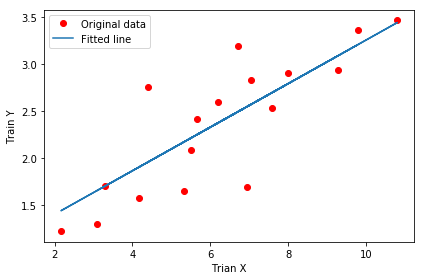

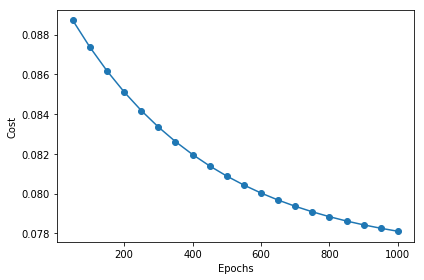

In [8]:
# Launch the graph
learning_rate = 0.01
training_epochs = 1000
display_step = 50
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    # Fit all training data
    cost_list = []
    epoch_list = []
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch={}, Training cost={:.5f}, W={:.5f}, b={:.5f}".format(
                epoch+1, c, sess.run(W)[0, 0], sess.run(b)[0]))
            cost_list.append(c)
            epoch_list.append(epoch+1)
    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost={:.5f}, W={:.5f}, b={:.5f}\n".format(
        training_cost, sess.run(W)[0, 0], sess.run(b)[0]))
    
    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.xlabel('Trian X')
    plt.ylabel('Train Y')
    plt.tight_layout()
    plt.show()
    
    plt.plot(epoch_list, cost_list, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.tight_layout()
    plt.show()

#### 随机梯度下降

Epoch=50, Training cost=5.19313, W=-0.12764, b=0.08820
Epoch=100, Training cost=0.44371, W=0.22071, b=0.13804
Epoch=150, Training cost=0.12490, W=0.31087, b=0.15286
Epoch=200, Training cost=0.10259, W=0.33719, b=0.16002
Epoch=250, Training cost=0.10592, W=0.32835, b=0.16058
Epoch=300, Training cost=0.10421, W=0.35128, b=0.16664
Epoch=350, Training cost=0.10171, W=0.33876, b=0.16691
Epoch=400, Training cost=0.10512, W=0.32800, b=0.16689
Epoch=450, Training cost=0.10147, W=0.34262, b=0.17123
Epoch=500, Training cost=0.10243, W=0.34726, b=0.17349
Epoch=550, Training cost=0.10119, W=0.34182, b=0.17433
Epoch=600, Training cost=0.10398, W=0.35097, b=0.17786
Epoch=650, Training cost=0.10080, W=0.34020, b=0.17821
Epoch=700, Training cost=0.10127, W=0.34415, b=0.18043
Epoch=750, Training cost=0.10063, W=0.33574, b=0.18208
Epoch=800, Training cost=0.10033, W=0.33694, b=0.18430
Epoch=850, Training cost=0.10015, W=0.33819, b=0.18635
Epoch=900, Training cost=0.10052, W=0.33327, b=0.18709
Epoch=950,

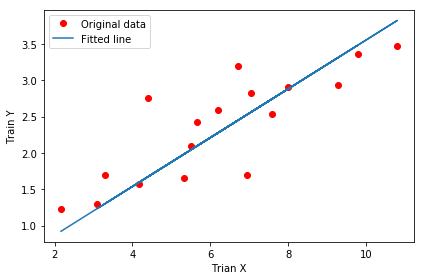

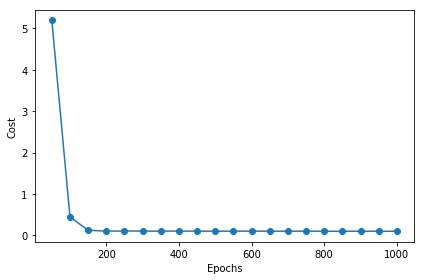

In [9]:
# Launch the graph
batch_size = 1  # 每次用 1 个数据迭代
with tf.Session() as sess:
    sess.run(init)
    cost_list = []
    epoch_list = []
    
    # Fit all training data
    for epoch in range(training_epochs):
        r = np.random.permutation(len(train_Y))  # 每次迭代都是随机挑选数据
        train_X = train_X[r]
        train_Y = train_Y[r]
        start = (epoch*batch_size) % 17
        end = (epoch*batch_size) % 17 + batch_size
        sess.run(optimizer, feed_dict={X: train_X[start:end], Y: train_Y[start:end]})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch={}, Training cost={:.5f}, W={:.5f}, b={:.5f}".format(
                epoch+1, c, sess.run(W)[0, 0], sess.run(b)[0]))
            cost_list.append(c)
            epoch_list.append(epoch+1)
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost={:.5f}, W={:.5f}, b={:.5f}\n".format(
        training_cost, sess.run(W)[0, 0], sess.run(b)[0]))
    
    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.xlabel('Trian X')
    plt.ylabel('Train Y')
    plt.tight_layout()
    plt.show()
    
    plt.plot(epoch_list, cost_list, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.tight_layout()
    plt.show()

**小结：**

随机梯度下降明显比 batch 梯度下降收敛速度快，但也容易飘过全局最小

## 2. 解释交叉熵的优化效果   

为什么加了 Sigmoid 之后，用交叉熵做损失函数比用差值平方的效果好？

[Neural networks and deep learning](http://neuralnetworksanddeeplearning.com/chap3.html) 文章提到：当神经元接近1时， Sigmoid 的函数会变得非常平坦，因此 $\sigma'(z)$ 就会变的非常小，这是使用 MSE 学习速率便慢的根源，而使用交叉熵作为损失函数后，对权重求偏导会发现，$\sigma'(z)$ 和 $\sigma(z)(1-\sigma(z))$ 都能消除，参考式子 (58-61) 权重的学习，速率完全被 $\sigma(z) - y$ 控制了，这就避免了学习的减速。

另外这篇文章也给出了一个例子说明 [Why You Should Use Cross-Entropy Error Instead Of Classification Error Or Mean Squared Error For Neural Network Classifier Training | James D. McCaffrey](https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/) 相比 ACE，使用 MSE 时候，计算结果会过分强调不正确的输出，这也可能是一大毛病。

> MSE isn’t a hideously bad approach but if you think about how MSE is computed you’ll see that, compared to ACE, MSE gives too much emphasis to the incorrect outputs. 

* [Neural networks and deep learning](http://neuralnetworksanddeeplearning.com/chap3.html)
* [Why You Should Use Cross-Entropy Error Instead Of Classification Error Or Mean Squared Error For Neural Network Classifier Training | James D. McCaffrey](https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/)
* [Mean squared error - Wikipedia](https://en.wikipedia.org/wiki/Mean_squared_error)
* [Cross entropy - Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)